In [2]:
from keras.datasets import imdb

In [4]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 58s 3us/step


In [6]:
train_labels[0]

1

In [7]:
max([max(sequence) for sequence in train_data])

9999

In [8]:
word_index = imdb.get_word_index()

1646592/1641221 [==============================] - 4s 3us/step


In [10]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [11]:
reverse_word_index[1]

'the'

In [12]:
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [13]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [14]:
import numpy as np

In [15]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

In [16]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [19]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [20]:
from keras import models
from keras import layers

In [21]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(16, activation='relu', ))
model.add(layers.Dense(1, activation='sigmoid'))

In [24]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [23]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [25]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 227us/step - loss: 0.5087 - acc: 0.7805 - val_loss: 0.3798 - val_acc: 0.8687
Epoch 2/20
15000/15000 [==============================] - 2s 149us/step - loss: 0.3006 - acc: 0.9053 - val_loss: 0.3004 - val_acc: 0.8900
Epoch 3/20
15000/15000 [==============================] - 2s 136us/step - loss: 0.2180 - acc: 0.9281 - val_loss: 0.3084 - val_acc: 0.8714
Epoch 4/20
15000/15000 [==============================] - 2s 133us/step - loss: 0.1751 - acc: 0.9437 - val_loss: 0.2839 - val_acc: 0.8839
Epoch 5/20
15000/15000 [==============================] - 2s 145us/step - loss: 0.1426 - acc: 0.9545 - val_loss: 0.2847 - val_acc: 0.8863
Epoch 6/20
15000/15000 [==============================] - 3s 192us/step - loss: 0.1149 - acc: 0.9655 - val_loss: 0.3134 - val_acc: 0.8780
Epoch 7/20
15000/15000 [==============================] - 2s 152us/step - loss: 0.0978 - acc: 0.9708 - val_loss: 0.3129 - 

In [26]:
history_dict = history.history

In [27]:
history_dict.keys()

dict_keys(['val_acc', 'val_loss', 'loss', 'acc'])

In [28]:
import matplotlib.pyplot as plt

In [29]:
history_dict = history.history

In [32]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

epochs = range(1, len(acc_values) + 1)

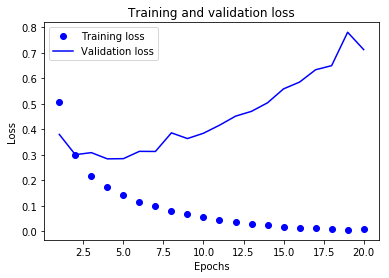

In [34]:
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [35]:
from keras.datasets import reuters

In [36]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 5s 2us/step


In [68]:
len(test_data)

2246

In [40]:
len(test_data)

2246

In [42]:
train_data[0]

[1,
 2,
 2,
 8,
 43,
 10,
 447,
 5,
 25,
 207,
 270,
 5,
 3095,
 111,
 16,
 369,
 186,
 90,
 67,
 7,
 89,
 5,
 19,
 102,
 6,
 19,
 124,
 15,
 90,
 67,
 84,
 22,
 482,
 26,
 7,
 48,
 4,
 49,
 8,
 864,
 39,
 209,
 154,
 6,
 151,
 6,
 83,
 11,
 15,
 22,
 155,
 11,
 15,
 7,
 48,
 9,
 4579,
 1005,
 504,
 6,
 258,
 6,
 272,
 11,
 15,
 22,
 134,
 44,
 11,
 15,
 16,
 8,
 197,
 1245,
 90,
 67,
 52,
 29,
 209,
 30,
 32,
 132,
 6,
 109,
 15,
 17,
 12]

In [43]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

557056/550378 [==============================] - 5s 10us/step


In [44]:
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [45]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [69]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [46]:
from keras.utils import to_categorical

In [54]:
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [55]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [56]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [70]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [71]:
train_labels.shape

(8982,)

In [72]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 225us/step - loss: 2.4981 - acc: 0.4910 - val_loss: 1.6770 - val_acc: 0.6510
Epoch 2/20
7982/7982 [==============================] - 1s 160us/step - loss: 1.3878 - acc: 0.7041 - val_loss: 1.2767 - val_acc: 0.7190
Epoch 3/20
7982/7982 [==============================] - 1s 157us/step - loss: 1.0467 - acc: 0.7692 - val_loss: 1.1175 - val_acc: 0.7640
Epoch 4/20
7982/7982 [==============================] - 1s 158us/step - loss: 0.8231 - acc: 0.8282 - val_loss: 1.0218 - val_acc: 0.7770
Epoch 5/20
7982/7982 [==============================] - 1s 168us/step - loss: 0.6587 - acc: 0.8634 - val_loss: 0.9706 - val_acc: 0.7950
Epoch 6/20
7982/7982 [==============================] - 1s 162us/step - loss: 0.5241 - acc: 0.8924 - val_loss: 0.9209 - val_acc: 0.8100
Epoch 7/20
7982/7982 [==============================] - 1s 161us/step - loss: 0.4276 - acc: 0.9122 - val_loss: 0.9116 - val_acc: 0.8020


In [73]:
from keras.datasets import boston_housing

In [74]:
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57344/57026 [==============================] - 2s 29us/step


In [75]:
train_data.shape

(404, 13)

In [76]:
test_data.shape

(102, 13)

In [77]:
mean = np.mean(train_data, axis=0)
std = np.std(train_data, axis=0)

train_data -= mean
train_data /= std

test_data -= mean
test_data /= std

In [82]:
from keras import models
from keras import layers

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [83]:
import numpy as np

k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i+1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i+1) * num_val_samples]
    
    partial_train_data = np.concatenate([train_data[:i * num_val_samples], train_data[(i+1) * num_val_samples:]], axis=0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples], train_targets[(i+1) * num_val_samples:]], axis=0)
    
    model = build_model()
    model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [84]:
all_scores

[2.1255709192540384,
 2.2480411694781615,
 2.9872445068737066,
 2.3177247389708415]

In [85]:
np.mean(all_scores)

2.419645333644187